In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("dark_background")
plt.rcParams.update({'figure.figsize': (60, 30), 'font.size': 28})

In [3]:
ds = pd.read_csv("dataset_tk.csv")

In [4]:
ds["date"], ds["ap"] = ds[ds.columns[0]], ds["Andhra Pradesh"]

In [5]:
ds.drop(ds.columns[:-2], axis = 1, inplace = True)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    503 non-null    object 
 1   ap      503 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [7]:
ds

date     ap
0    02/01/2019 00:00:00  164.6
1    03/01/2019 00:00:00  170.1
2    04/01/2019 00:00:00  165.2
3    05/01/2019 00:00:00  167.4
4    06/01/2019 00:00:00  171.2
..                   ...    ...
498  01/12/2020 00:00:00  196.5
499  02/12/2020 00:00:00  197.6
500  03/12/2020 00:00:00  197.3
501  04/12/2020 00:00:00  186.1
502  05/12/2020 00:00:00  181.9

[503 rows x 2 columns]

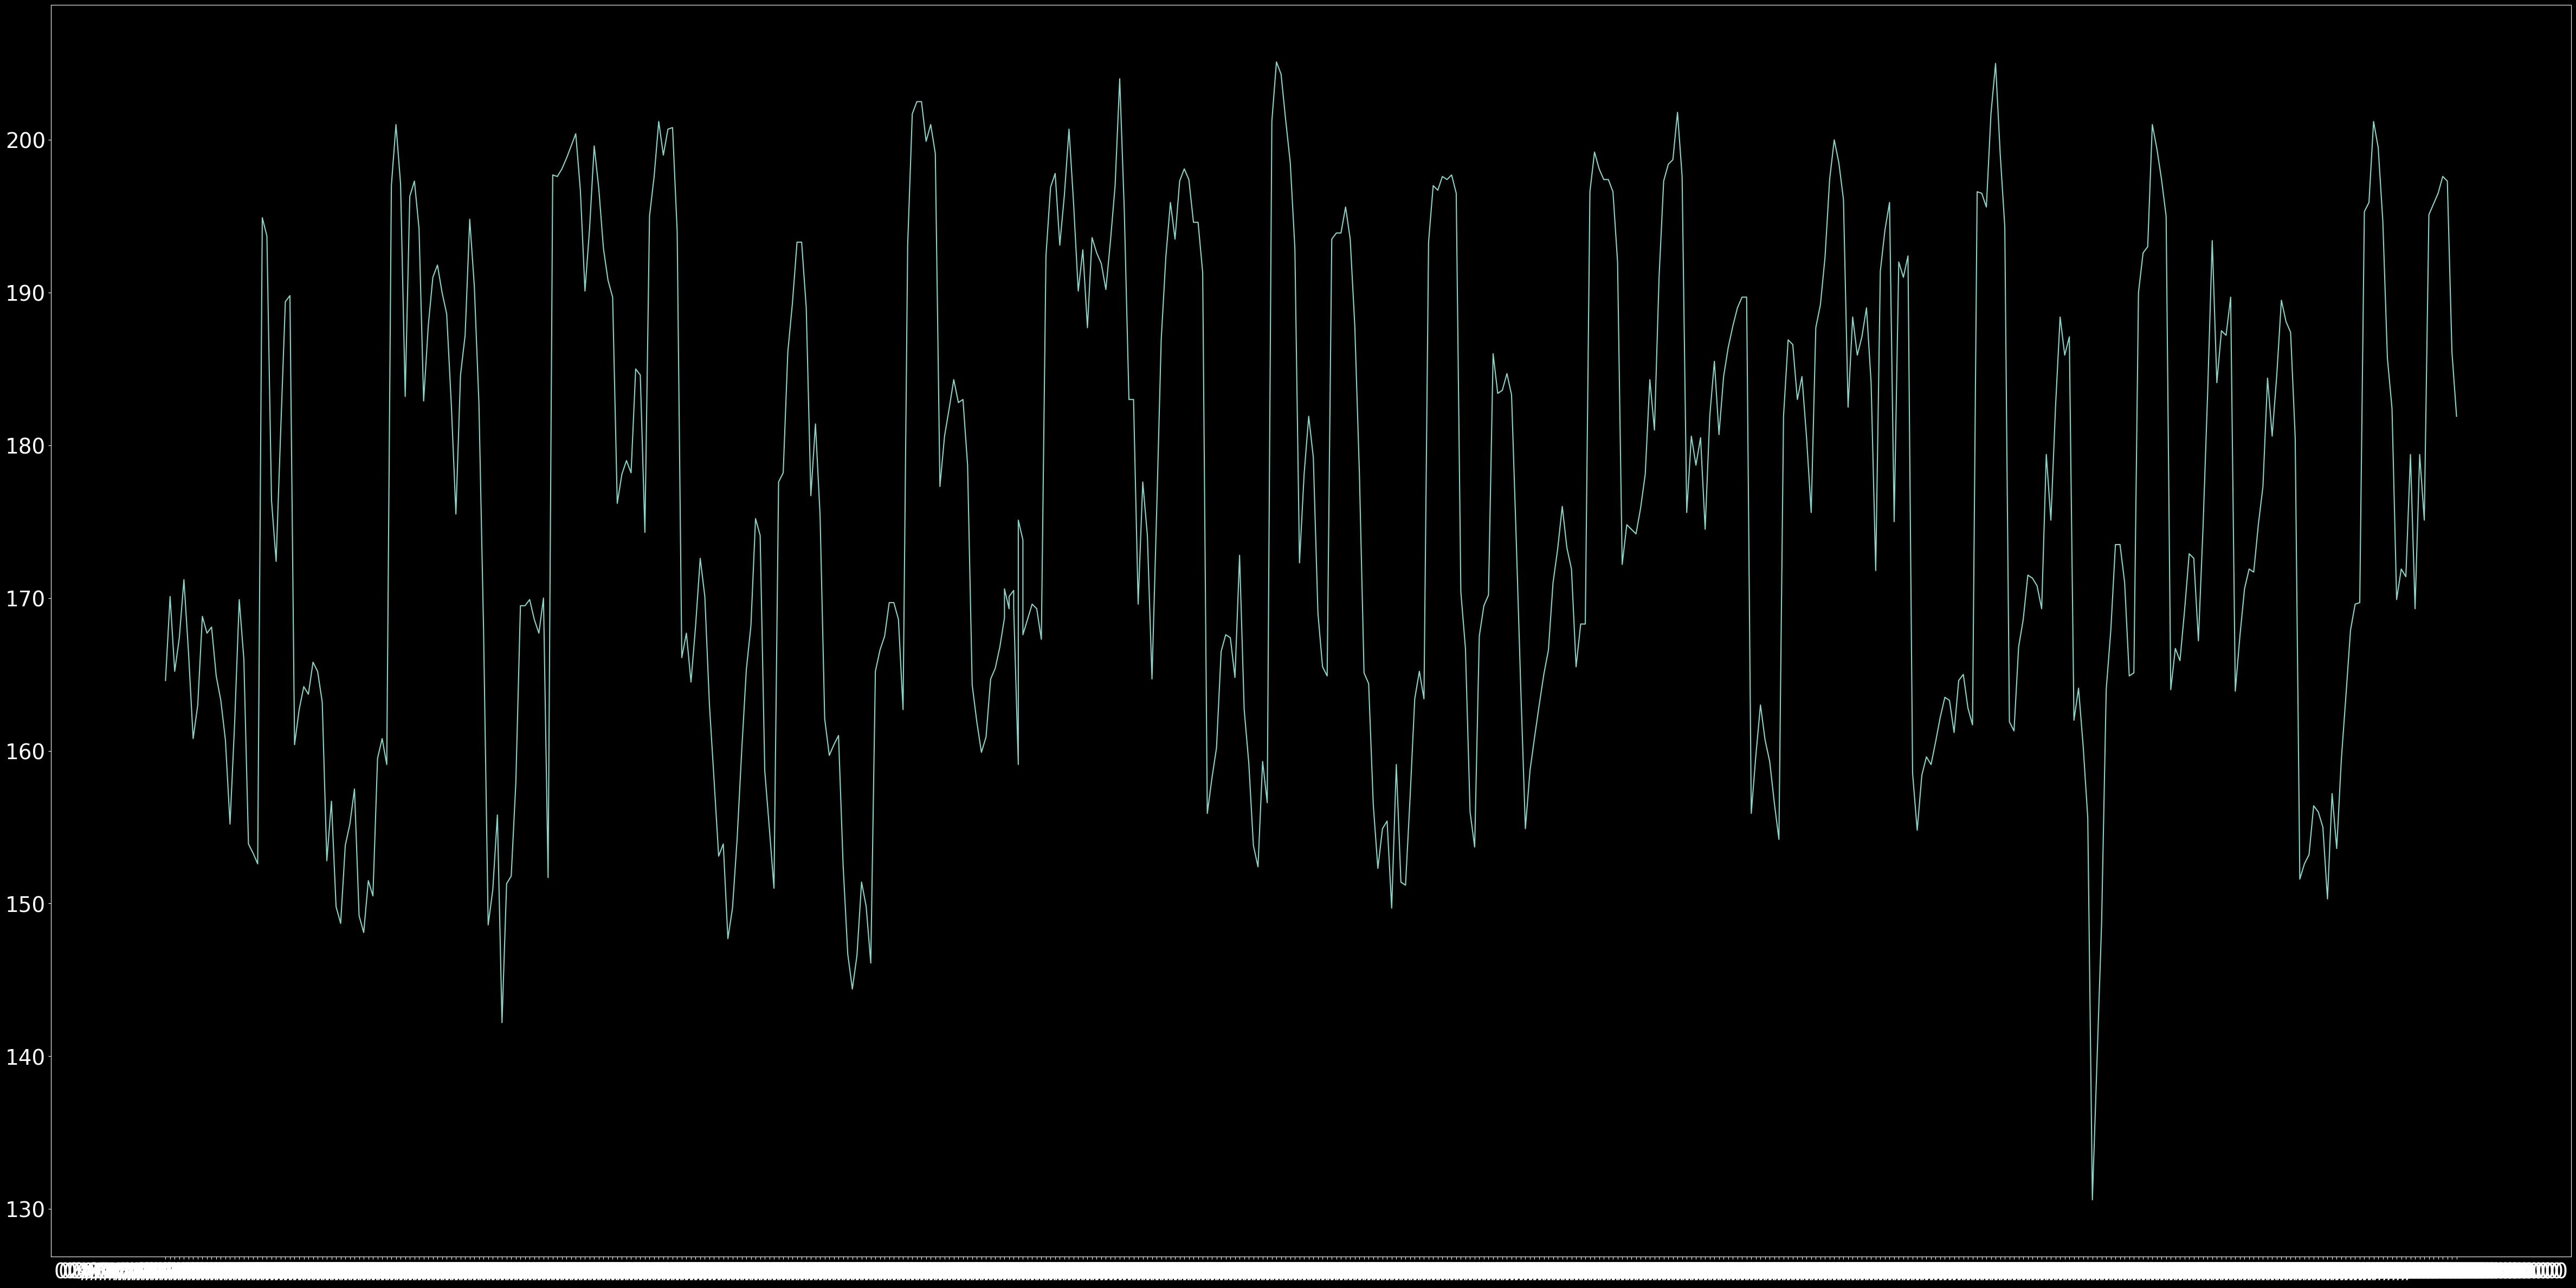

In [8]:
plt.plot(ds["date"], ds["ap"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12076\1401383696.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  seasonal_decompose(ds["ap"], model='additive', period = 30).plot().show()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12076\1401383696.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  m.plot().show()


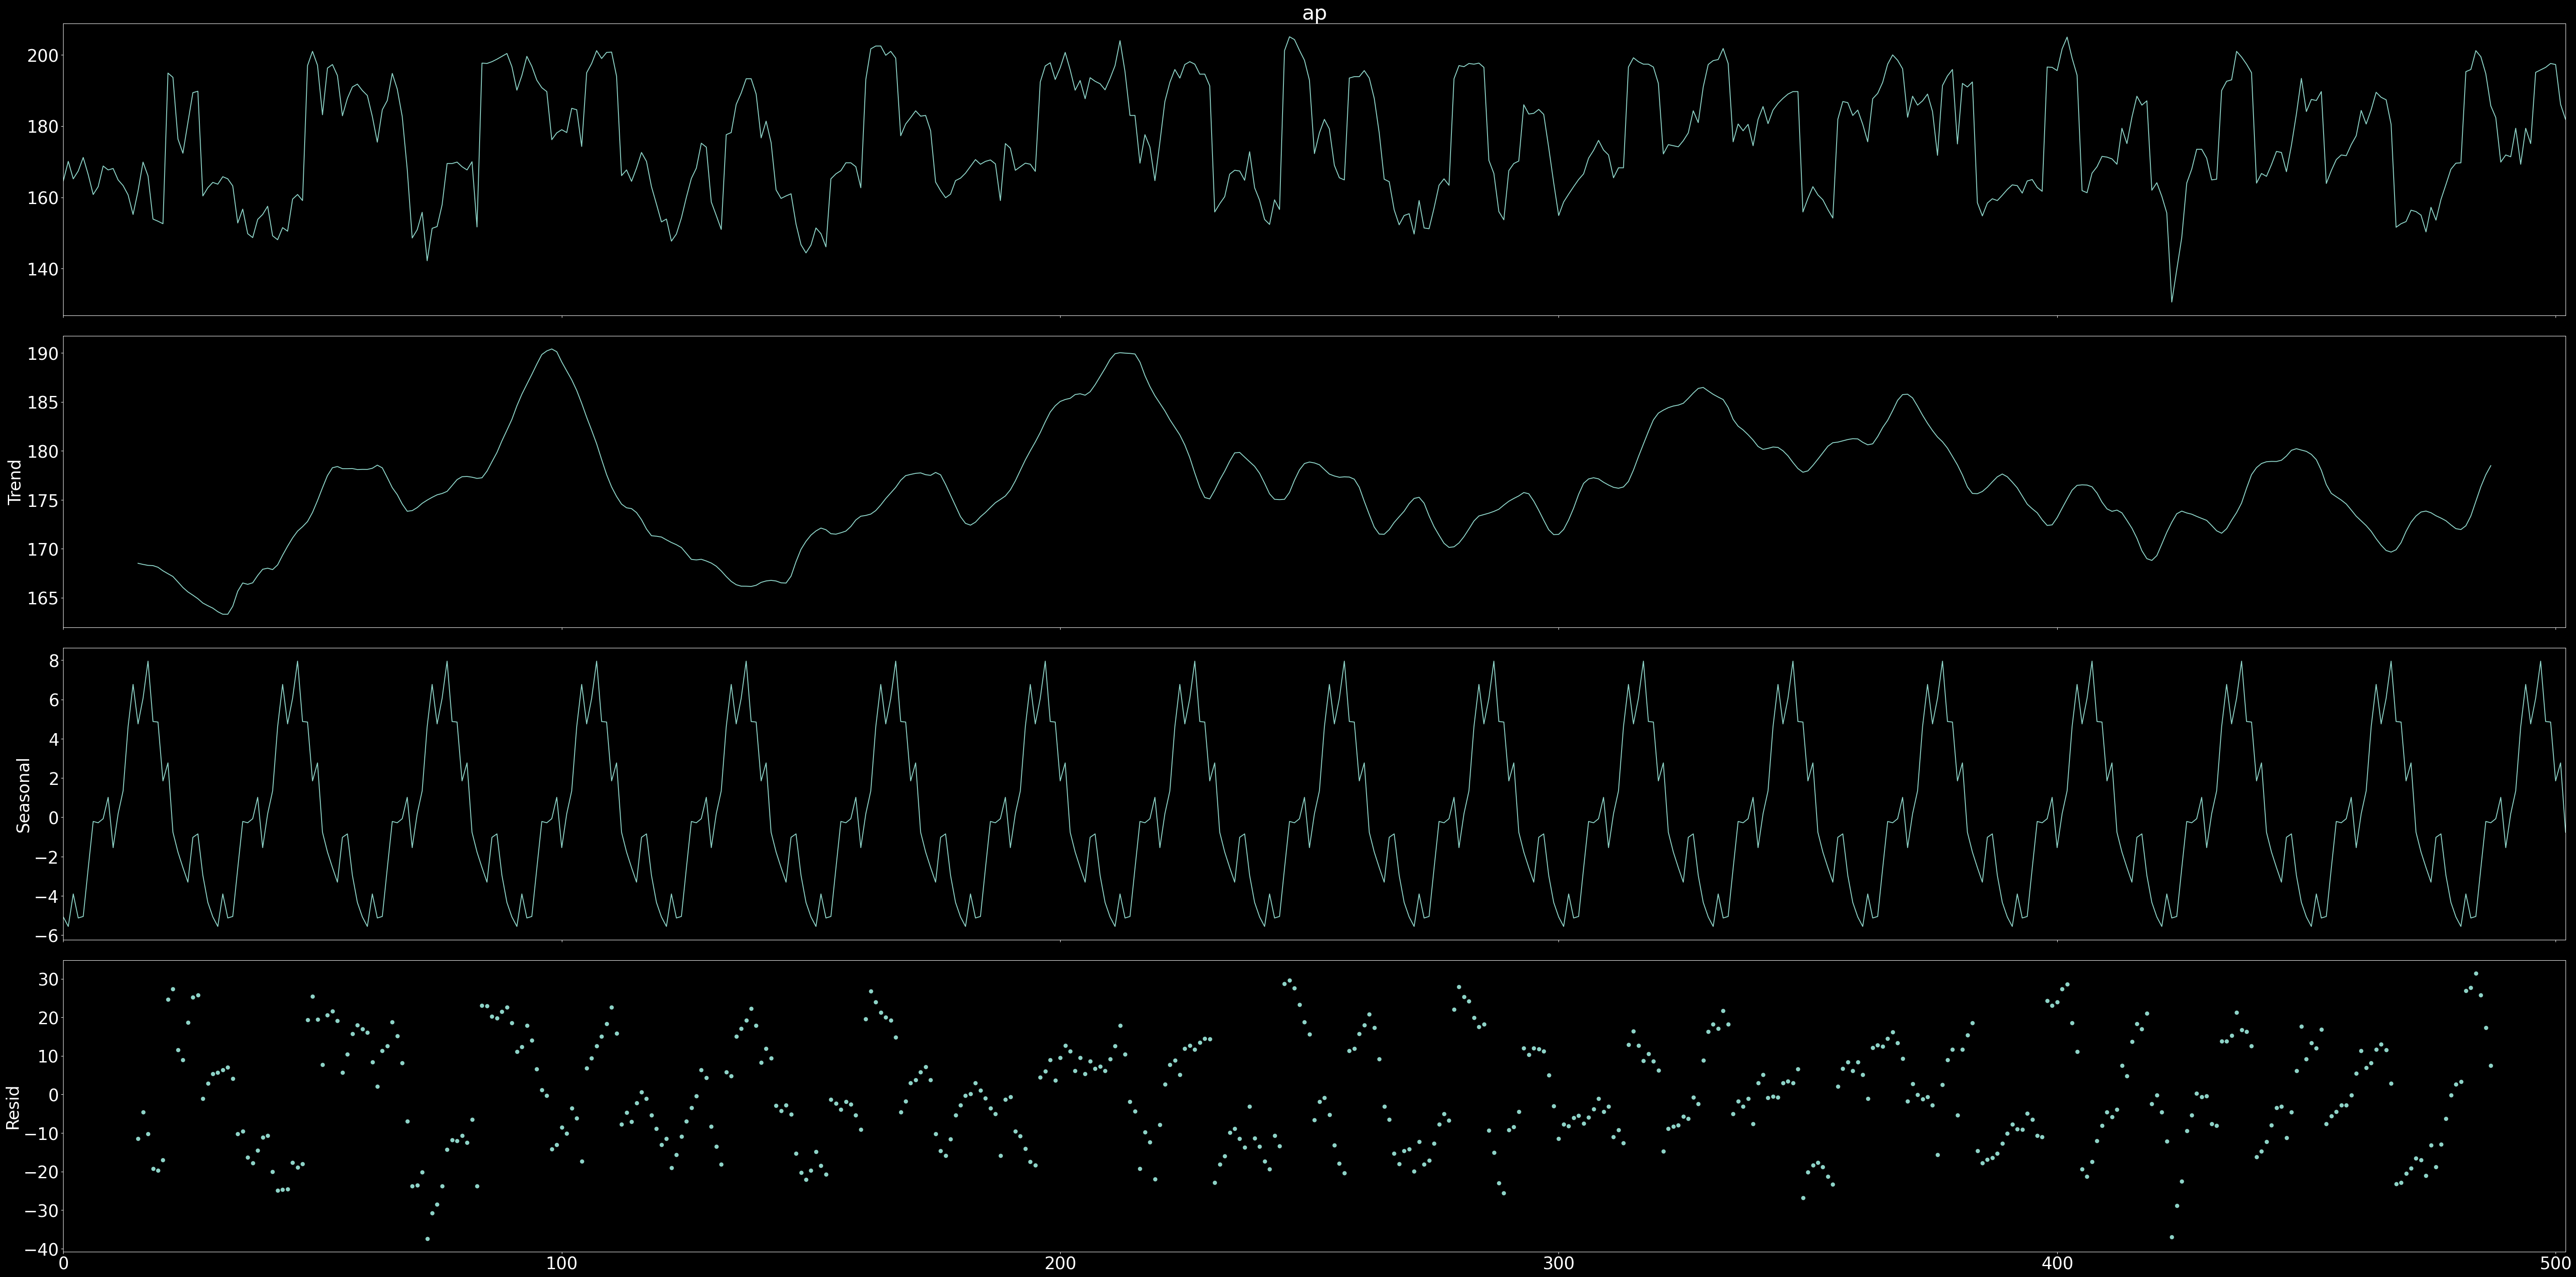

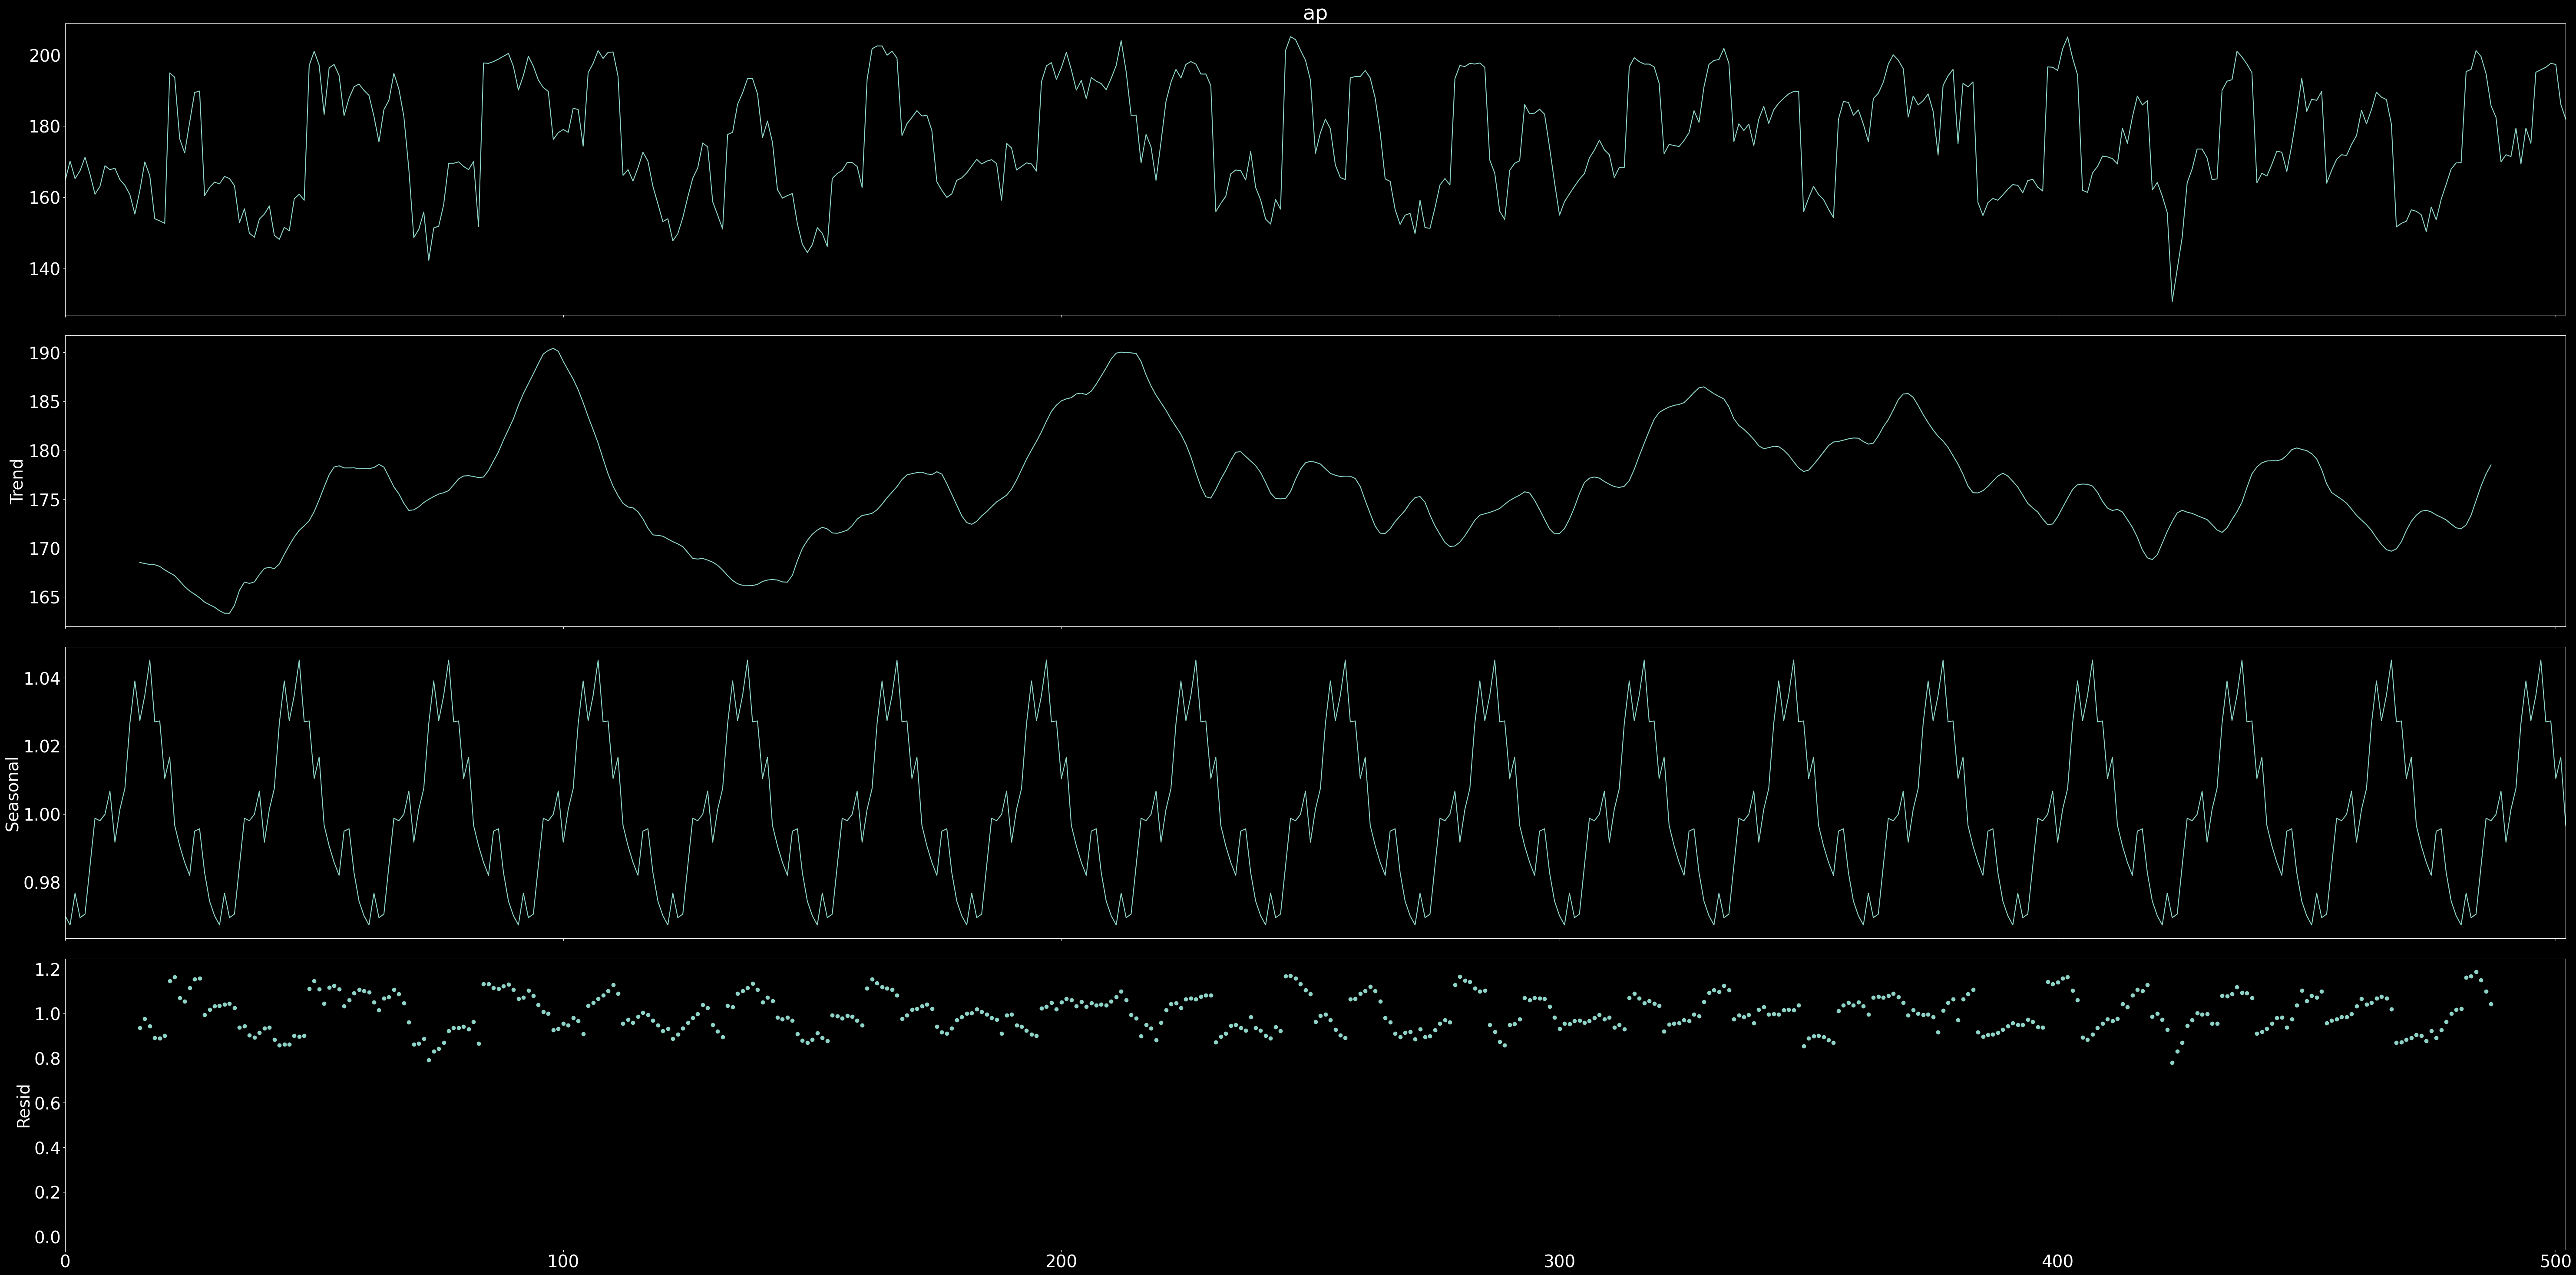

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(ds["ap"], model='additive', period = 30).plot().show()
m = seasonal_decompose(ds["ap"], model='multiplicative', period = 30)
m.plot().show()

In [10]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(result):
    print('ADF Statistic: %f' % result[0])
    print('p-value: %.18f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    print ("\n stationary \n" if result[1] < 0.05 else "\n Non stationary \n")

def kpss_test(result):    
    print('kpss Statistic: %f' % result[0])
    print('p-value: %.18f' % result[1])
    print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))

    print ("\n stationary \n" if result[1] < 0.05 else "\n Non stationary \n")

adf_test(adfuller(ds["ap"]))
kpss_test(kpss(ds["ap"]))

ADF Statistic: -6.364338
p-value: 0.000000024307068305
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570

 stationary 

kpss Statistic: 0.156268
p-value: 0.100000000000000006
Critical Values:

 Non stationary 



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12076\3392415811.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test(kpss(ds["ap"]))


<Axes: >

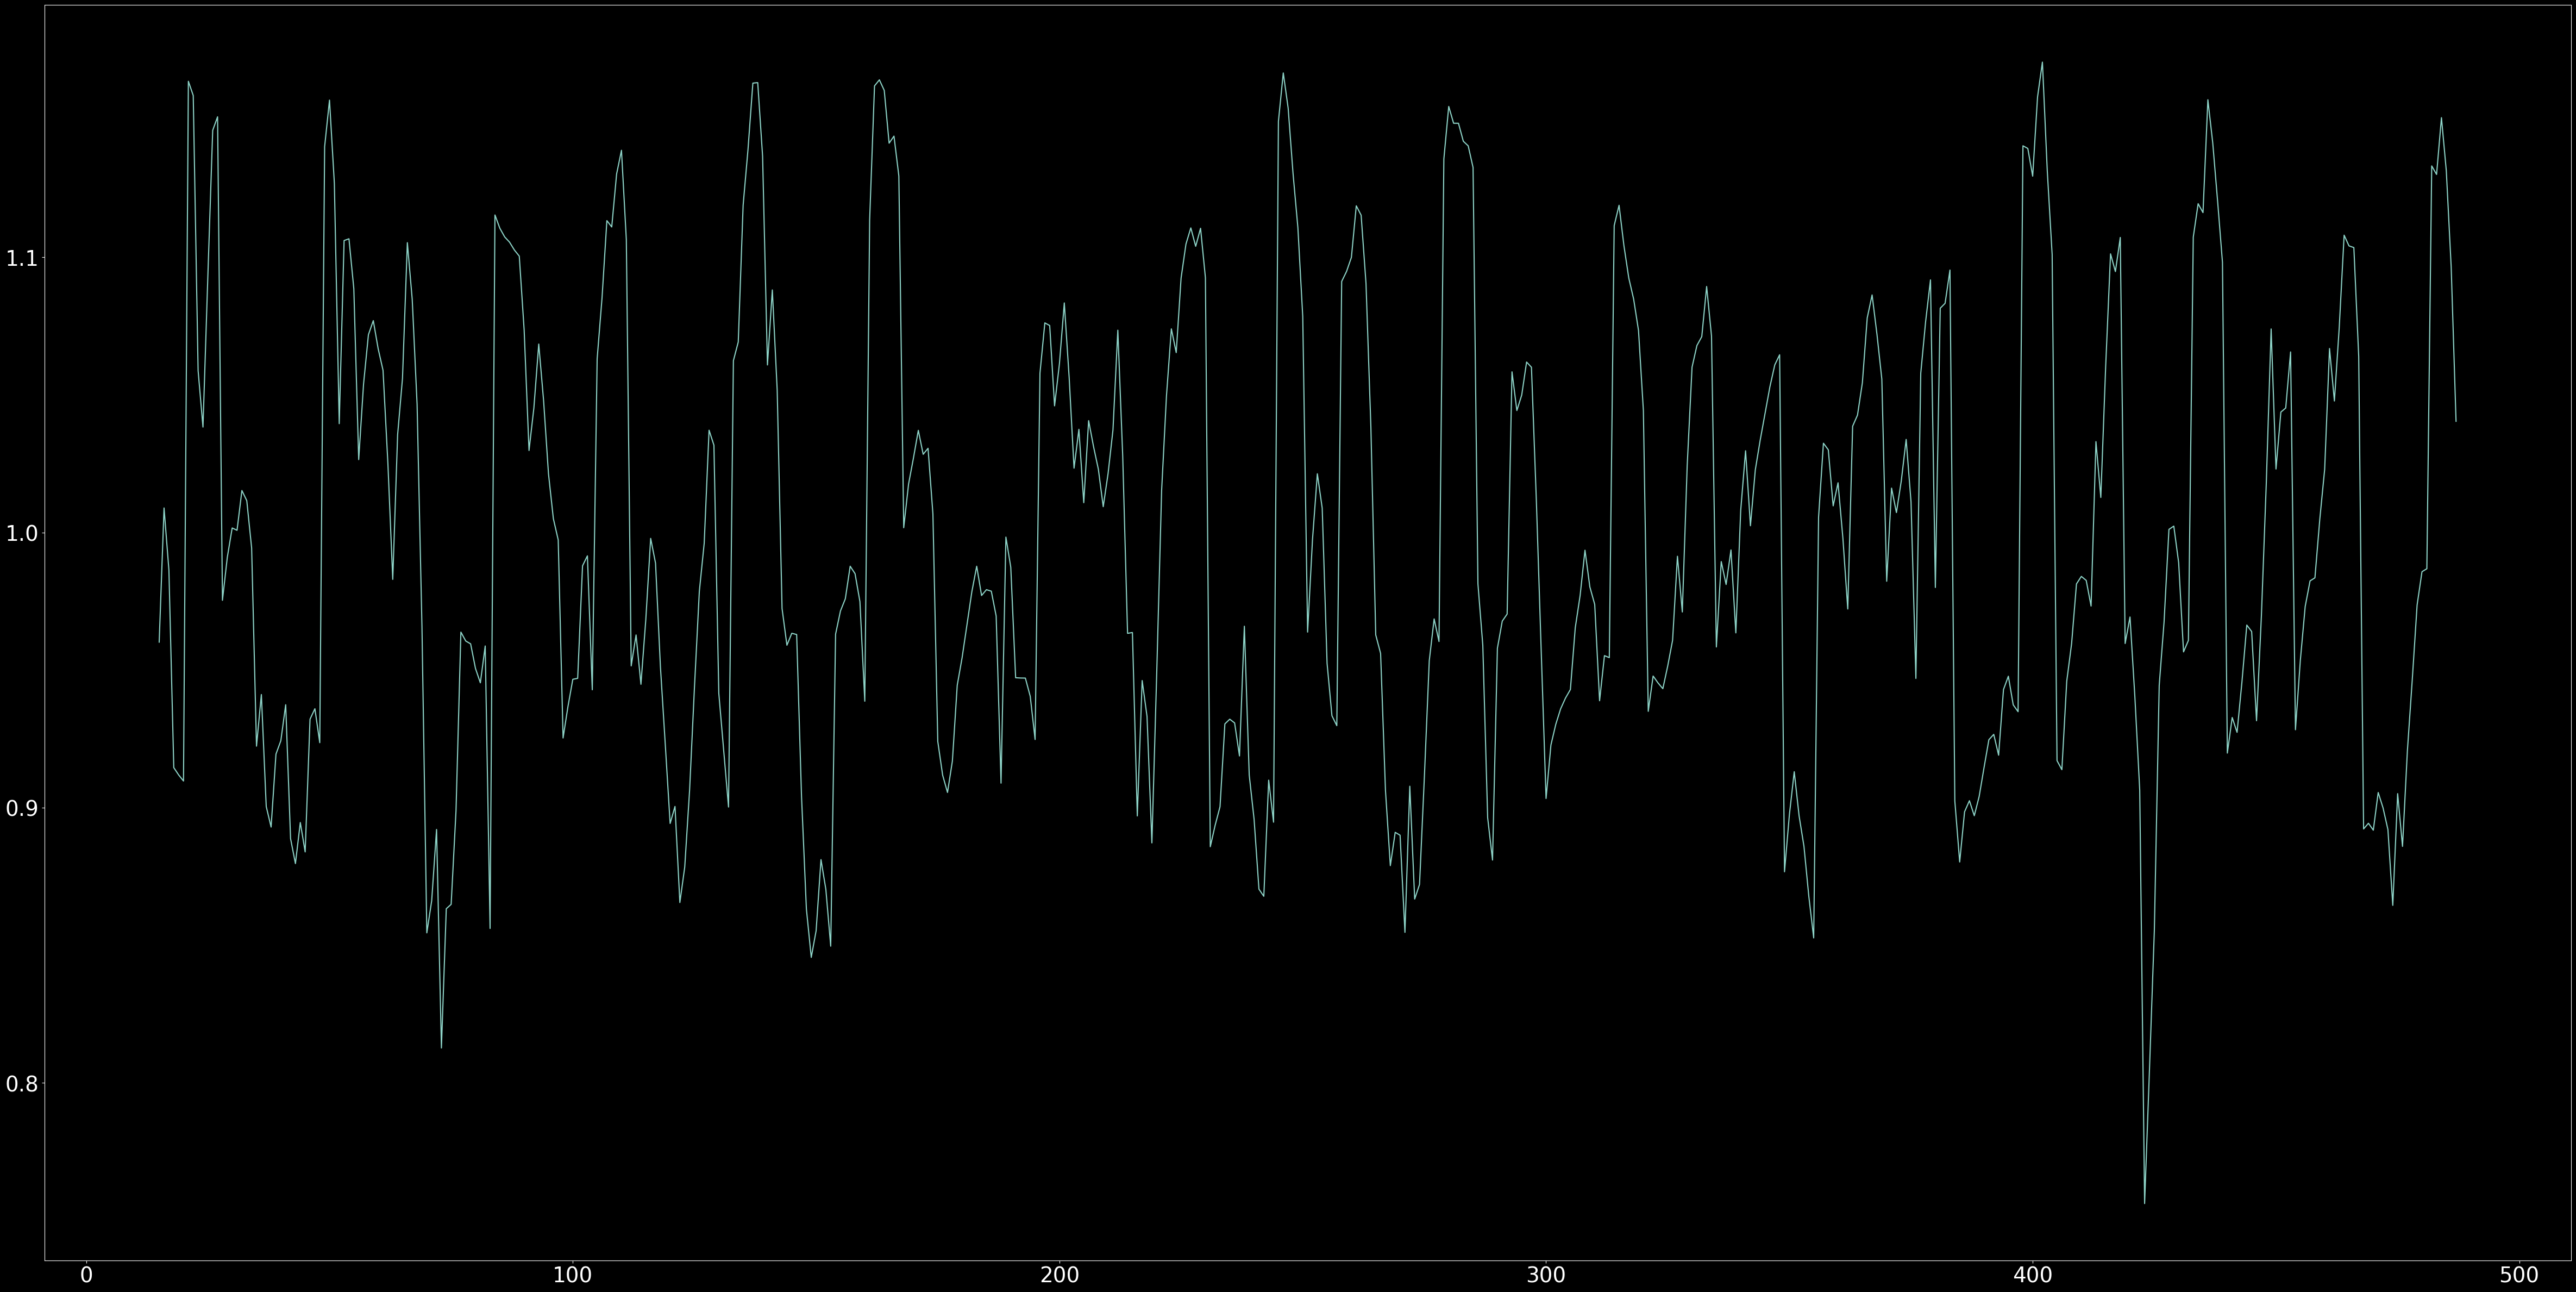

In [11]:
(ds["ap"] / m.trend).plot()

<Axes: >

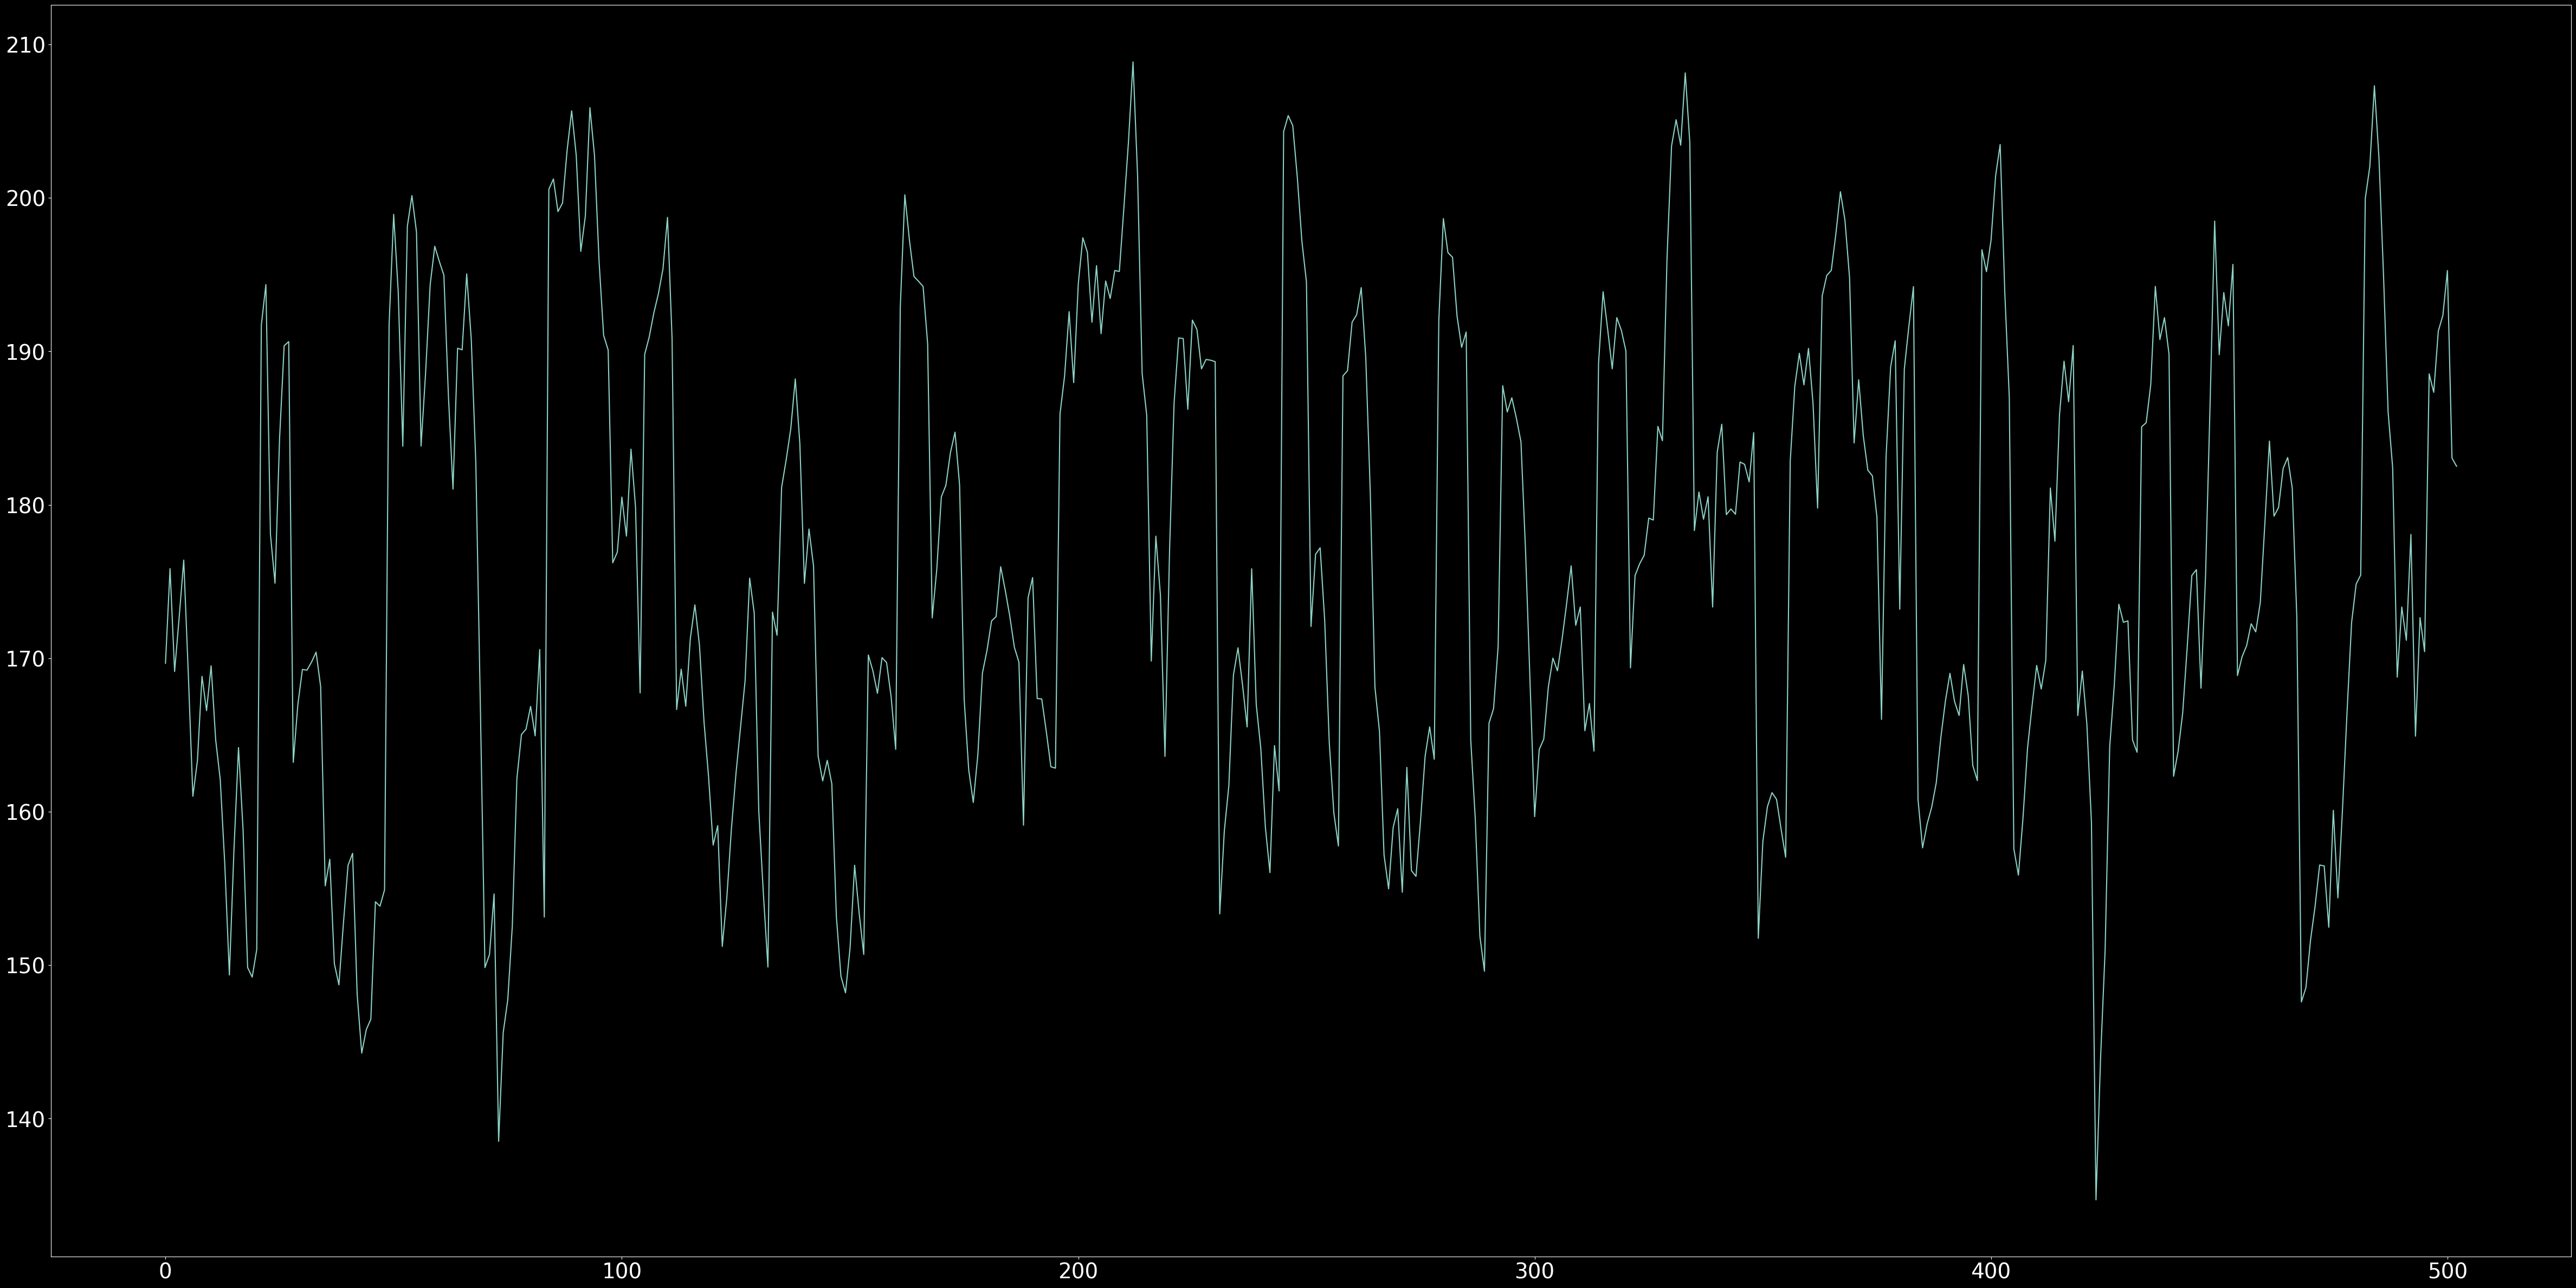

In [12]:
(ds["ap"] / m.seasonal).plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

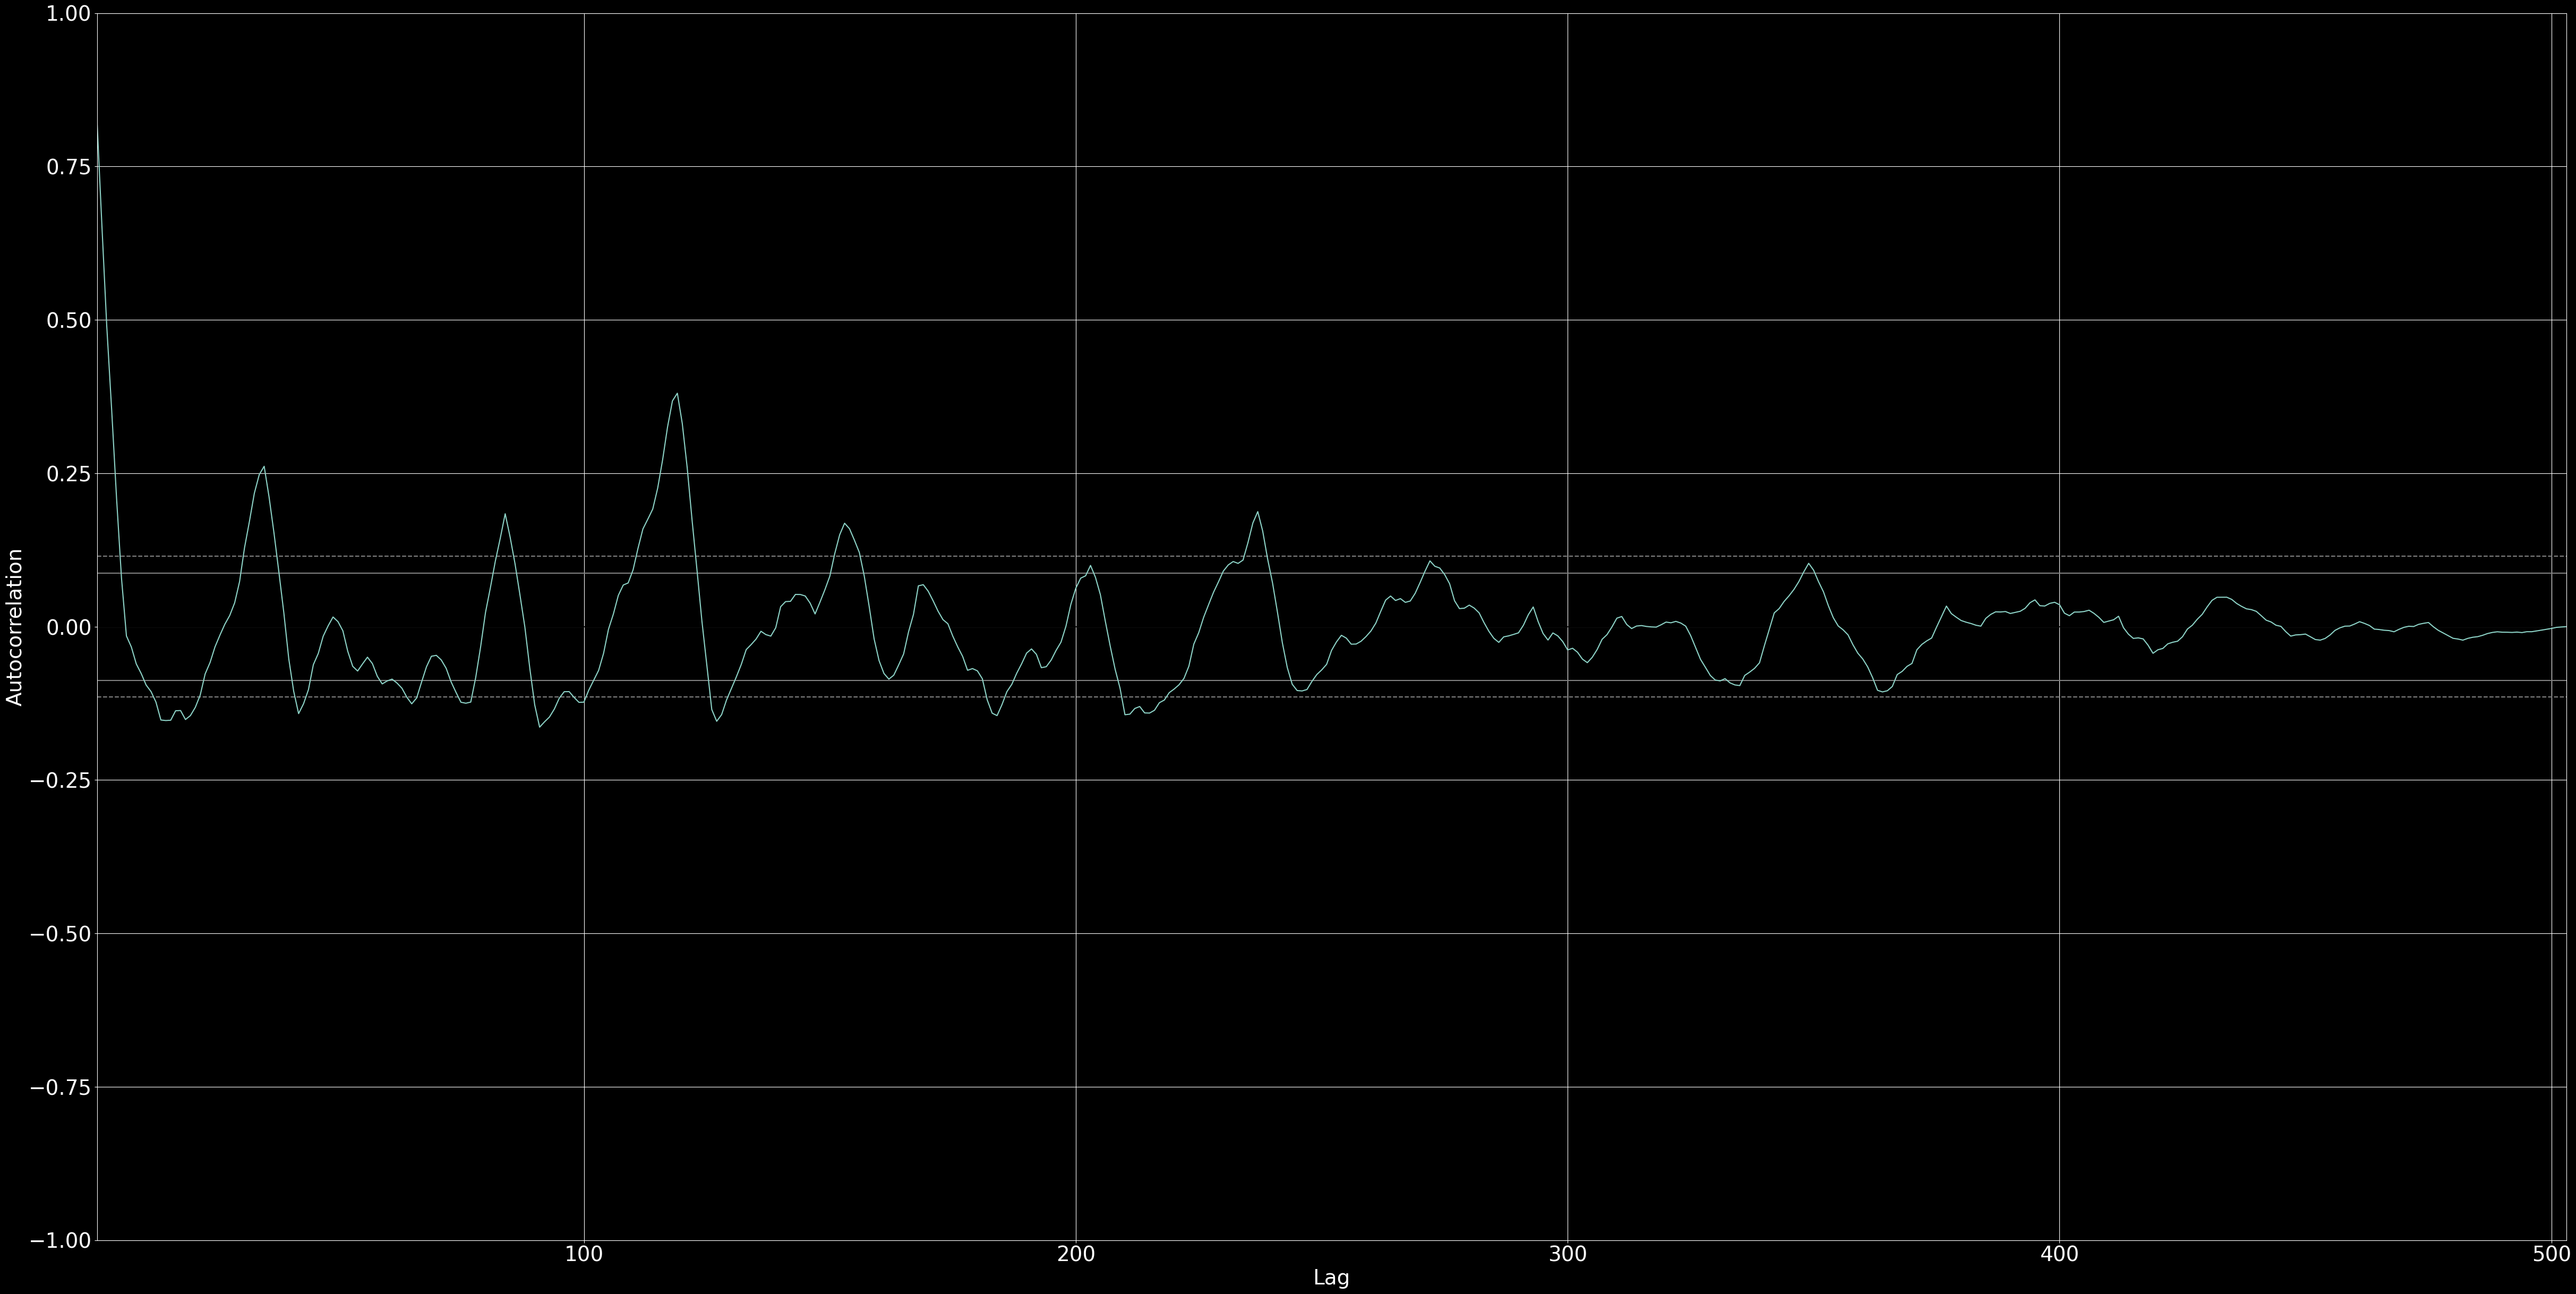

In [13]:
pd.plotting.autocorrelation_plot(ds["ap"])

Figure(6000x3000)


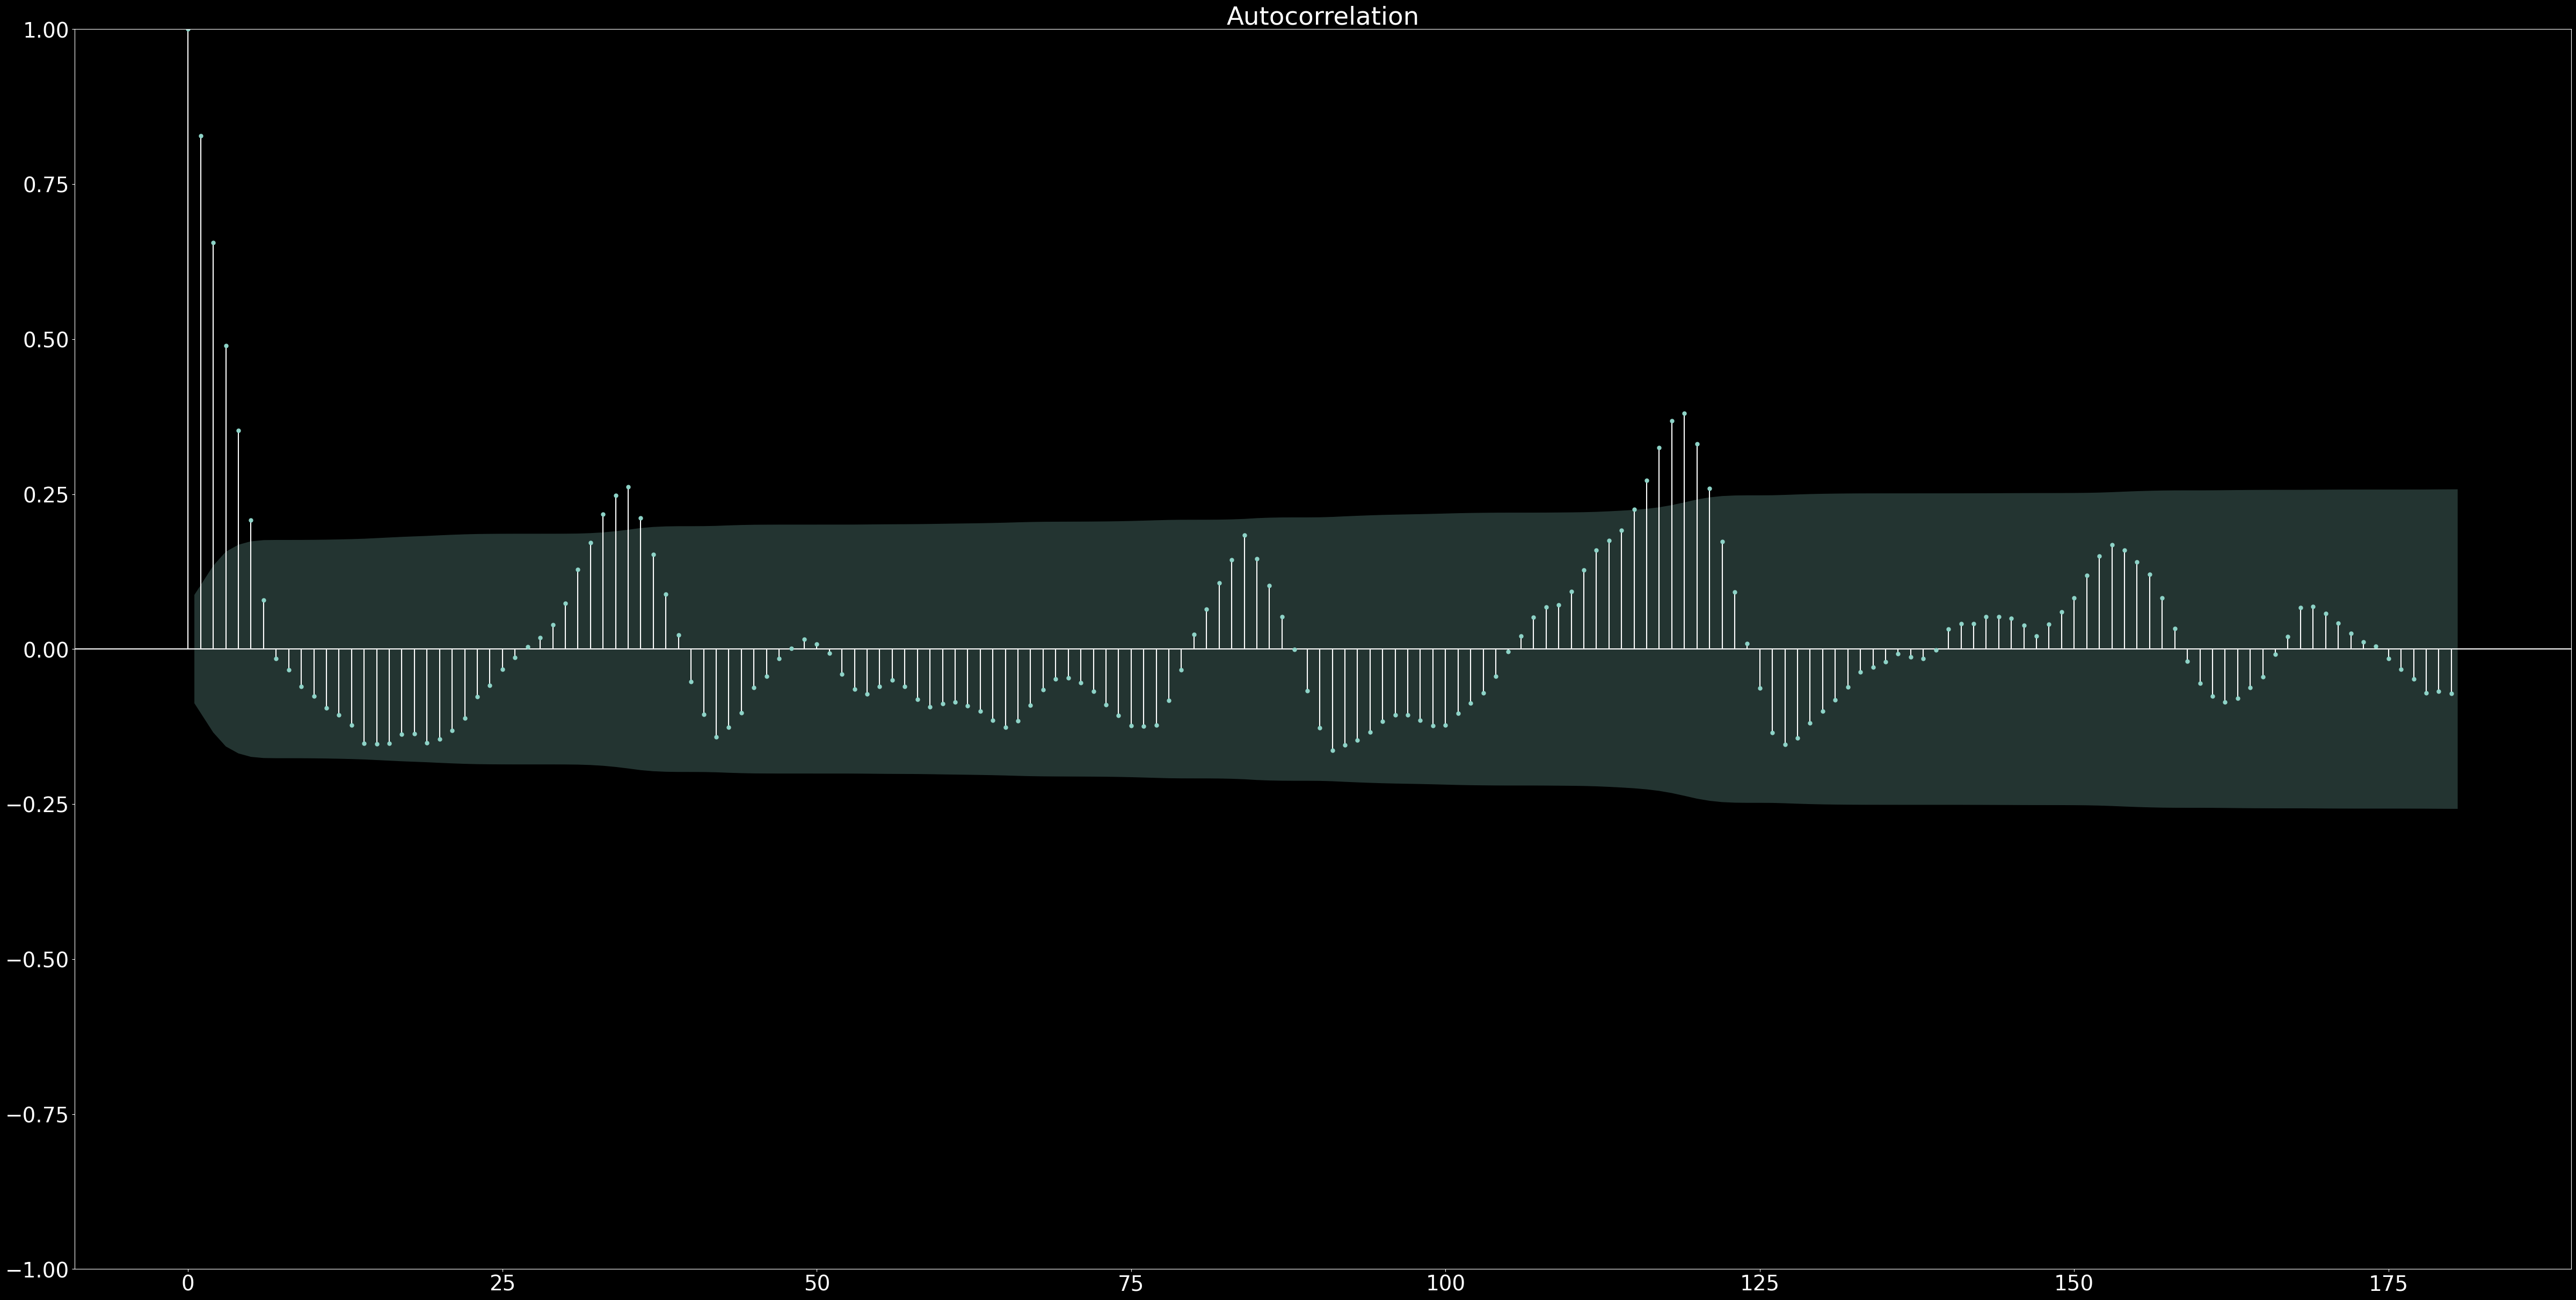

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print (plot_acf(ds["ap"], lags = 180))

Figure(6000x3000)


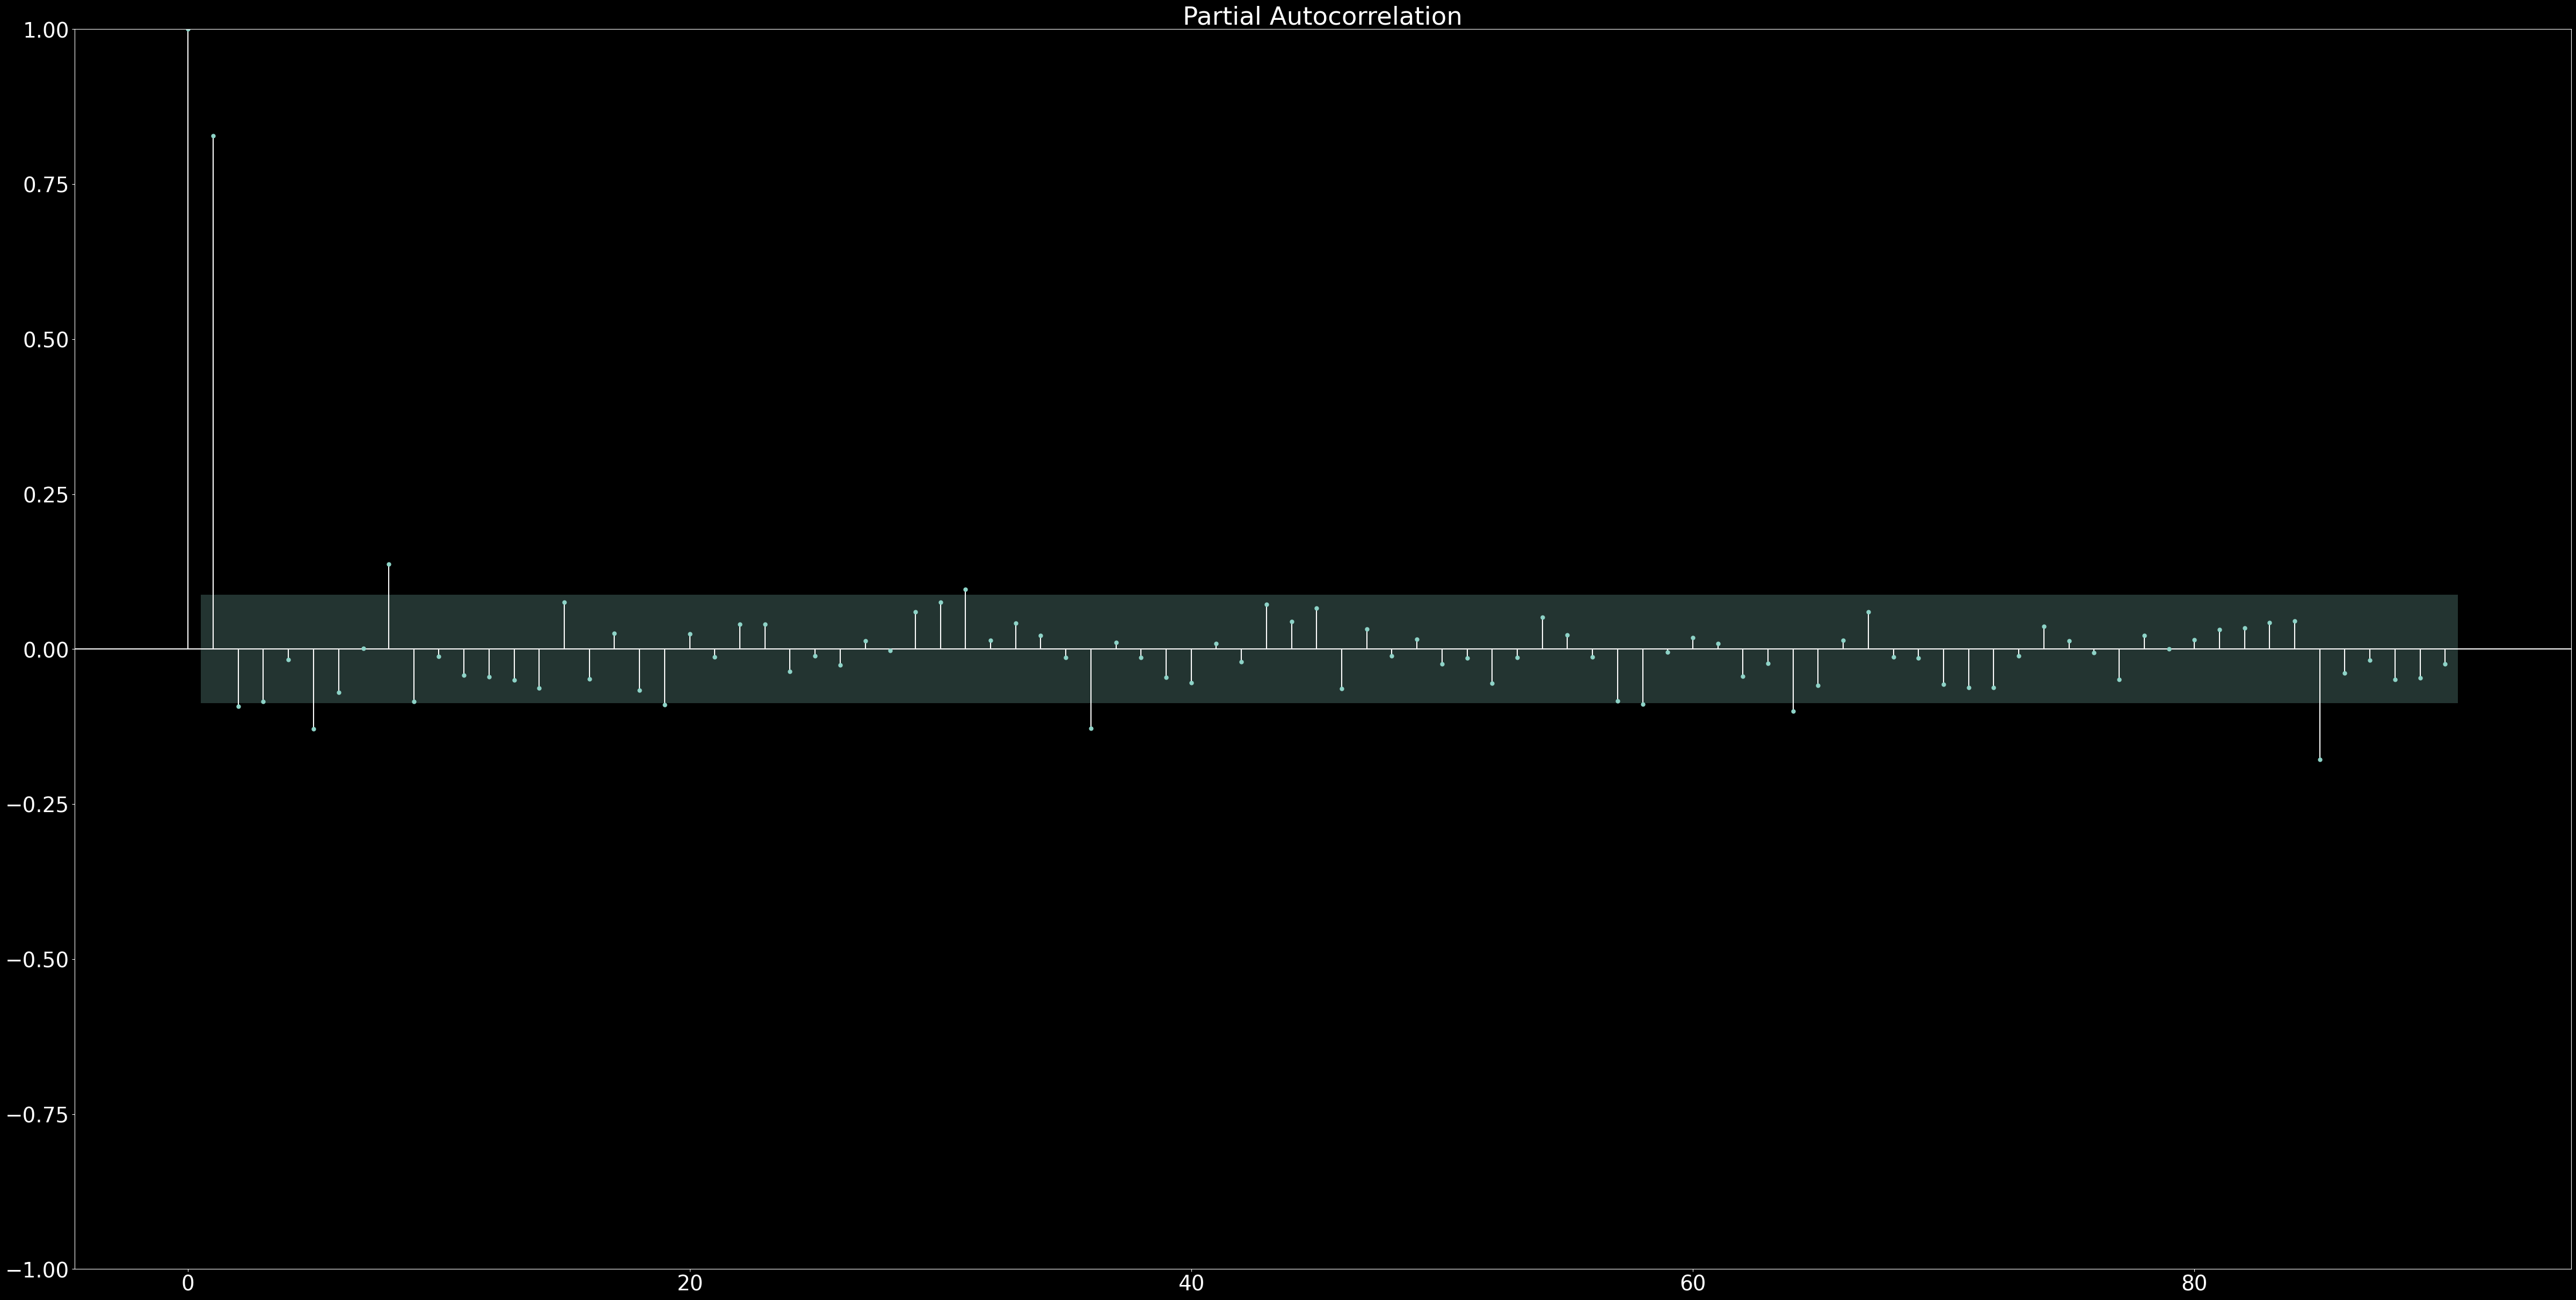

In [15]:
print (plot_pacf(ds["ap"], lags = 90))
